# Kerr-microscopy example dataset
## Introduction
Kerr microscopy measurement of an as-transformed $\tau-(\mathrm{Mn}_{53}\mathrm{Al}_{45}\mathrm{C}_2)_{99.4}\mathrm{Ni}_{0.6}$-sample, homogenization at 1100°C for 120 min, then cooled in air inside the quartz-glass ampule, in order to obtain the tau-phase. Field was applied in-plane. Contrast was selected for in plane components of magnetic domains.

The measurement was saved in an HDF5-file.
## Data analysis
First, we need to import some libraries to handle and plot the data.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from tools.read_h5 import read_h5
import requests
from io import BytesIO
# dataDir = 'IFW_Kerr-Microscopy_RawData/'

In [20]:
#data = h5py.File(dataDir + 'MnAl22450.hdf5', 'r')
# upload_id = ''
# url = f'https://nomad-lab.eu/prod/v1/api/v1/uploads/{upload_id}/raw/IFW_Kerr-Microscopy_RawData/MnAl22450.hdf5'
url = 'https://keeper.mpdl.mpg.de/f/46499f01b0354f10a784/?dl=1'

response = requests.get(url, stream=True)
total_size = int(response.headers.get('content-length', 0))
buffer = BytesIO()
chunk_size = 1024  # 1 KB
with tqdm(total=total_size, unit='B', unit_scale=True, desc="Downloading", ncols=80) as pbar:
    for chunk in response.iter_content(chunk_size=chunk_size):
        if chunk:
            buffer.write(chunk)
            pbar.update(len(chunk))
buffer.seek(0)
data = h5py.File(buffer, 'r')

Downloading:   0%|                                  | 0.00/2.03G [00:00<?, ?B/s]

Now we can access the measurement data. For example, we can plot a raw image and a difference image at some magnetic field strength.

Text(5, 5, 'H = -286 mT')

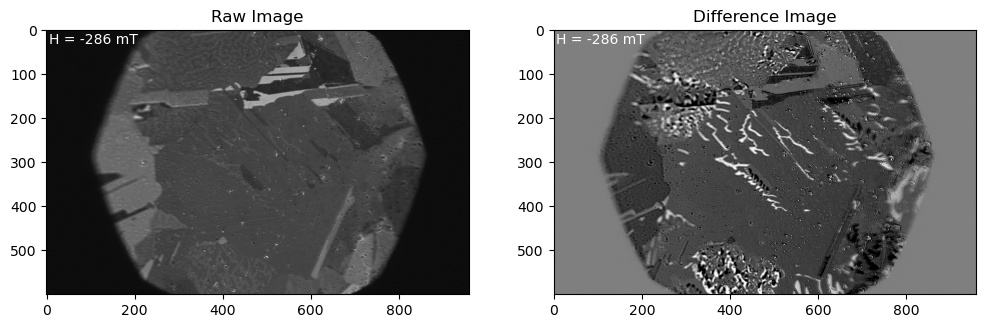

In [21]:
imgnum = 123

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.imshow(data['Data/MOKE/RAW'][imgnum], cmap='gray')
ax1.set_title('Raw Image')
ax2.imshow(data['Data/MOKE/DIFF'][imgnum], cmap='gray')
ax2.set_title('Difference Image')
ax1.text(5, 5, f'H = {data['Data/MOKE/Magnetic Field'][imgnum]:.0f} mT', va='top', ha='left', color='white')
ax2.text(5, 5, f'H = {data['Data/MOKE/Magnetic Field'][imgnum]:.0f} mT', va='top', ha='left', color='white')

We can also plot the systeresis of the gray levels over their respective magnetic field.

Text(0, 0.5, 'Gray level')

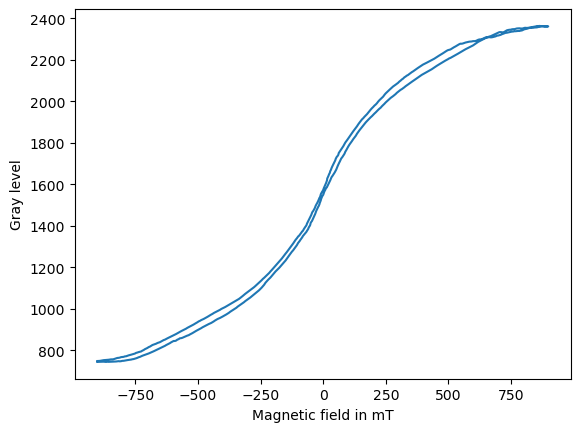

In [22]:
fig, ax = plt.subplots()

ax.plot(data['Data/MOKE/Magnetic Field'][:], data['Data/MOKE/Gray Level'][:])
ax.set_xlabel('Magnetic field in mT')
ax.set_ylabel('Gray level')